# Importing Required and Necessary Libraries/Modules

In this cell, we are importing the required modules/libraries that we require to create our model.

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt
from   tensorflow       import keras
from   tensorflow.keras import layers
from   tensorflow.keras import Sequential
from   tensorflow.keras.layers import Dense
from   sklearn.model_selection import train_test_split
from   sklearn.metrics  import accuracy_score , mean_squared_error, r2_score
from   google.colab     import drive

# Mouting the Drive
In this section, I'm mounting the google drive and accessing the file for '**breast-cancer**'.Then, I'll open the file on which we have to perform operations.

In [2]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')
df.head() # Prints the first 5 values of the data set

Mounted at /content/drive


,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,3-5,True,2,left,right_up,False,recurrence-events


# Data Visualization
In this section, I'm visualizing the data so that we can have a better understanding of the data.

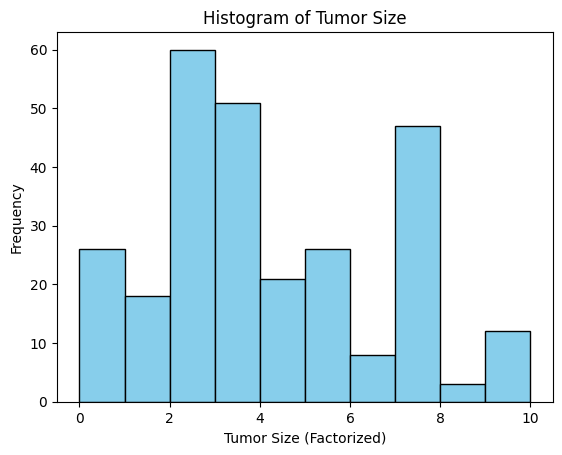

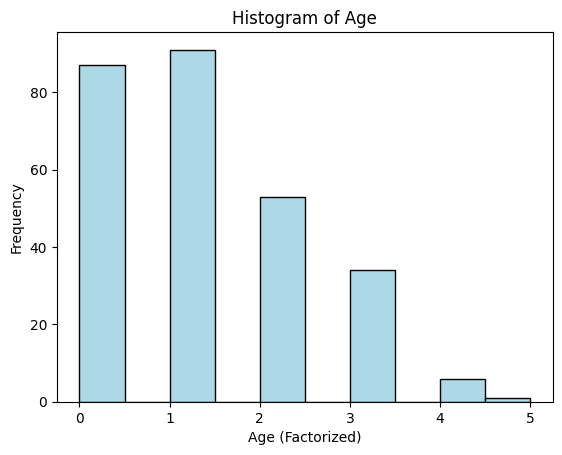

In [3]:
# Factorizing the data
# Assigns the value to the interval of data
df['tumor-size_num'] = pd.factorize(df['tumor-size'])[0]
df['age_num'] = pd.factorize(df['age'])[0]

# Plotting the histogram of tumor size
plt.hist(df['tumor-size_num'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Tumor Size')
plt.xlabel('Tumor Size (Factorized)')
plt.ylabel('Frequency')
plt.show()

# Plotting the histogram of age
plt.hist(df['age_num'], bins=10, color='lightblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age (Factorized)')
plt.ylabel('Frequency')
plt.show()

# Model Compilation and Training
In this section, we are compiling the model and then training it to predict the values.

In this cell, we are compiling the model.

In [4]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) # Created a layer with one neuron
model = tf.keras.Sequential([l0]) # Passing the layer to the model
model.compile(optimizer='adam', loss='mean_squared_error') # Compiling the model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the model with our dataset.

In [5]:
# Spliting the data to ensure proper training and testing the model.
X_train, X_test, y_train, y_test = train_test_split(df['age_num'], df['tumor-size_num'], test_size=0.2, random_state=42)
# Training the model
history = model.fit(X_train, y_train, epochs=75, verbose=1)

print("Model has finished training")

Epoch 1/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 41.3895
Epoch 2/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.3341  
Epoch 3/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.7387  
Epoch 4/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.1122 
Epoch 5/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39.3971 
Epoch 6/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.2387 
Epoch 7/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.8495  
Epoch 8/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.4914  
Epoch 9/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.7516  
Epoch 10/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37.8935  
Epoch 11/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.0628  
Epoch 12/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.8366  
Epoch 13/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.5331 
Epoch 14/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.7740  
Epoch 15/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.9960  
Epoch 16/7

In [6]:
print(model.summary())
print("The value predicted by the model: ")
print(model.predict([X_test]))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

None
The value predicted by the model: 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[-0.4726824 ]
 [-0.4726824 ]
 [-1.4437627 ]
 [ 0.49839792]
 [ 0.49839792]
 [ 0.49839792]
 [-1.4437627 ]
 [-0.4726824 ]
 [-0.4726824 ]
 [-0.4726824 ]
 [-0.4726824 ]
 [-2.414843  ]
 [ 0.49839792]
 [ 0.49839792]
 [-0.4726824 ]
 [ 0.49839792]
 [-2.414843  ]
 [-0.4726824 ]
 [-0.4726824 ]
 [ 0.49839792]
 [ 0.49839792]
 [-0.4726824 ]
 [-0.4726824 ]
 [-0.4726824 ]
 [-1.4437627 ]
 [ 0.49839792]
 [ 0.49839792]
 [-0.4726824 ]
 [-2.414843  ]
 [-0.4726824 ]
 [ 0.49839792]
 [-1.4437627 ]
 [-0.4726824 ]
 [-1.4437627 ]
 [-0.4726824 ]
 [-0.4726824 ]
 [-0.4726824 ]
 [-1.4437627 ]
 [-2.414843  ]
 [-2.414843  ]
 [-0.4726824 ]
 [ 0.49839792]
 [-0.4726824 ]
 [-0.4726824 ]
 [ 0.49839792]
 [-1.4437627 ]
 [-0.4726824 ]
 [-1.4437627 ]
 [-0.4726824 ]
 [ 0.49839792]
 [-2.414843  ]
 [-2.414843  ]
 [ 0.49839792]
 [-1.4437627 ]
 [ 0.49839792]]


In [7]:
print("MSE")
mean_squared_error(y_test, model.predict(X_test))

MSE
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


23.08686065673828

In [8]:
print("R2 Score")
r2_score(y_test, model.predict(X_test))

R2 Score
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


-3.851191997528076